# 2 作业书写区

## 2.1 数据集的准备与介绍（30分）

猫猫狗狗的简单分类

In [1]:
#解压挂载的数据集在同级目录下
!unzip -oq data/data122407/Dataset.zip -d data/dataset

In [2]:
! tree /home/aistudio/data/ -d   #查看数据集目录结构

/home/aistudio/data/
├── data122407
└── dataset
    └── Dataset
        ├── test
        │   ├── cats
        │   └── dogs
        ├── train
        │   ├── cats
        │   └── dogs
        └── validation
            ├── cats
            └── dogs

12 directories


训练数据集文件夹 data/dataset/Dataset/train 皆为.jpg格式
验证数据集文件夹 data/dataset/Dataset/validation 皆为.jpg格式
测试数据集文件夹 data/dataset/Dataset/test  皆为.jpg格式

分类任务，文件夹名则为对应标签

In [3]:
# 图像的可视化操作
import cv2
import matplotlib.pyplot as plt

plt.imshow(cv2.imread('data/dataset/Dataset/train/cats/5.jpg'))

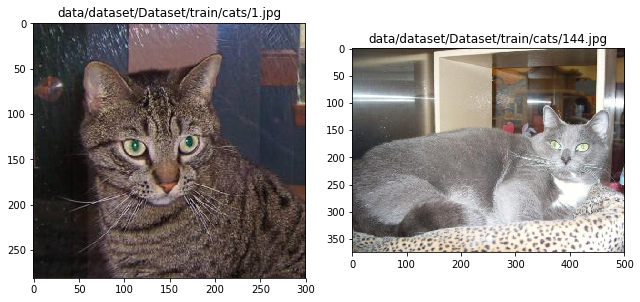

In [4]:
image_path_list = ['data/dataset/Dataset/train/cats/1.jpg', 'data/dataset/Dataset/train/cats/144.jpg']
plt.figure(figsize=(9, 9))

for i in range(len(image_path_list)):
    plt.subplot(1, 2, i+1)   
    plt.title(image_path_list[i])
    plt.imshow(cv2.imread(image_path_list[i])[:, :, ::-1])

plt.tight_layout()
plt.show()

In [5]:
import glob
import numpy as np

def get_mean_std(image_path_list):    #通过glob获得list
    print('Total images:', len(image_path_list))
    max_val, min_val = np.zeros(3), np.ones(3) * 255
    mean, std = np.zeros(3), np.zeros(3)
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        for c in range(3):
            mean[c] += image[:, :, c].mean()
            std[c] += image[:, :, c].std()
            max_val[c] = max(max_val[c], image[:, :, c].max())
            min_val[c] = min(min_val[c], image[:, :, c].min())

    mean /= len(image_path_list)
    std /= len(image_path_list)

    mean /= max_val - min_val
    std /= max_val - min_val

    return mean, std

class meanstd:   #给出猫和狗的mean与std信息
    def __init__(self, name):
         self.name = name
    def menstdd(self):
         mean, std = get_mean_std(glob.glob(('data/dataset/Dataset/train/{}/*.jpg').format(self.name)))
         print('mean:', mean)
         print('std:', std)

cats_md = meanstd('cats')
dogs_md = meanstd('dogs')
print('there are cats')
cats_md.menstdd()
print('there are dogs')
dogs_md.menstdd()


there are cats
Total images: 1000
mean: [0.41517471 0.44525497 0.48256971]
std: [0.22802675 0.22726697 0.23059065]
there are dogs
Total images: 1000
mean: [0.41400552 0.45855367 0.48874764]
std: [0.21989437 0.21922342 0.22670478]


# 数据集的定义

In [6]:
from paddle.io import Dataset
from paddle.vision.transforms import Compose,Transpose,Resize,Normalize
from paddle.vision.datasets import DatasetFolder
import numpy as np
import paddle
import paddle.nn.functional as F

In [10]:
class cats_and_dogsDataset(Dataset):
    def __init__(self,mode):
        super(cats_and_dogsDataset,self).__init__()
        transform_train=Compose([Resize(size=(224,224)),Transpose(),Normalize()])
        transform_eval=Compose([Resize(size=(224,224)),Transpose(),Normalize()])
        train_data_folder=DatasetFolder('data/dataset/Dataset/train',transform=transform_train)
        eval_data_folder=DatasetFolder('data/dataset/Dataset/validation',transform=transform_eval)
        test_data_folder=DatasetFolder('data/dataset/Dataset/test',transform=transform_eval)
        self.mode=mode
        if self.mode=='train':
            self.data=train_data_folder
        elif self.mode=='eval':
            self.data=eval_data_folder
        elif self.mode=='test':
            self.data=test_data_folder

    def __getitem__(self,index):
        data=np.array(self.data[index][0]).astype('float32')
        if self.mode=='test':
            label=np.array([self.data[index][1]]).astype('int64')
            return data, label
        else:
            label=np.array([self.data[index][1]]).astype('int64')
            return data,label
    
    def __len__(self):
        return len(self.data)

# 数据集的测试

In [11]:
train_dataset=cats_and_dogsDataset(mode="train")
valid_dataset=cats_and_dogsDataset(mode="eval")     
print("训练集一共有{}张，验证集一共有{}张".format(len(train_dataset),len(valid_dataset)))

训练集一共有2000张，验证集一共有1000张


In [12]:
print(len(train_dataset))

image, label = train_dataset[0]
print(image.shape, label.shape)

for image, label in train_dataset:
    print(image.shape, label.shape)
    break



2000
(3, 224, 224) (1,)
(3, 224, 224) (1,)


In [13]:
LABEL_MAP = ["cats","dogs"]
indexs=np.arange(888,1343)   #随机选取
haha_dataset = cats_and_dogsDataset(mode='train')  #查看数据集的标签

for idx in indexs:
    ceshi_label = haha_dataset[idx][1]
    print('标签是{}'.format(np.array(LABEL_MAP)[ceshi_label]))

标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是['cats']
标签是[